# NBA EDA and Data Visualization

### Data

For this project I used a dataset from Kaggle that contains NBA games data from the 2004 season to December 2020. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('precision', 2)
pd.set_option('display.max_columns', None)

### EDA

-Opening Datasets  
-Looking at the Columns
-Pulling up info on Object Types

In [3]:
games = pd.read_csv('games.csv')
ranking = pd.read_csv('ranking.csv')
players = pd.read_csv('players.csv')
games_details = pd.read_csv('games_details.csv')

In [4]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-12-19,12000047,Final,1610612753,1610612766,2020,1610612753,120.0,0.43,0.79,0.42,23.0,50.0,1610612766,117.0,0.44,0.86,0.44,21.0,52.0,1
1,2020-12-19,12000048,Final,1610612764,1610612765,2020,1610612764,99.0,0.43,0.62,0.29,24.0,45.0,1610612765,96.0,0.40,0.65,0.33,18.0,51.0,1
2,2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.40,0.74,0.40,21.0,43.0,1610612737,117.0,0.42,0.84,0.30,24.0,47.0,0
3,2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.37,0.69,0.26,19.0,45.0,1610612755,113.0,0.53,0.63,0.35,23.0,48.0,0
4,2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.38,0.74,0.36,27.0,37.0,1610612748,117.0,0.53,0.74,0.51,30.0,51.0,0


In [5]:
games.shape

(23520, 21)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23520 entries, 0 to 23519
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     23520 non-null  object 
 1   GAME_ID           23520 non-null  int64  
 2   GAME_STATUS_TEXT  23520 non-null  object 
 3   HOME_TEAM_ID      23520 non-null  int64  
 4   VISITOR_TEAM_ID   23520 non-null  int64  
 5   SEASON            23520 non-null  int64  
 6   TEAM_ID_home      23520 non-null  int64  
 7   PTS_home          23421 non-null  float64
 8   FG_PCT_home       23421 non-null  float64
 9   FT_PCT_home       23421 non-null  float64
 10  FG3_PCT_home      23421 non-null  float64
 11  AST_home          23421 non-null  float64
 12  REB_home          23421 non-null  float64
 13  TEAM_ID_away      23520 non-null  int64  
 14  PTS_away          23421 non-null  float64
 15  FG_PCT_away       23421 non-null  float64
 16  FT_PCT_away       23421 non-null  float6

In [7]:
games.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,2.35e+04,2.35e+04,2.35e+04,23520.00,2.35e+04,23421.00,23421.00,23421.00,23421.00,23421.00,23421.00,2.35e+04,23421.00,23421.00,23421.00,23421.00,23421.00,23421.00,23520.00
mean,2.16e+07,1.61e+09,1.61e+09,2010.96,1.61e+09,102.28,0.46,0.76,0.36,22.54,43.19,1.61e+09,99.34,0.45,0.76,0.35,21.14,41.88,0.59
std,5.58e+06,8.64e+00,8.66e+00,4.89,8.64e+00,12.95,0.06,0.10,0.11,5.15,6.61,8.66e+00,13.02,0.06,0.10,0.11,5.08,6.50,0.49
min,1.03e+07,1.61e+09,1.61e+09,2003.00,1.61e+09,36.00,0.25,0.14,0.00,6.00,15.00,1.61e+09,33.00,0.24,0.14,0.00,4.00,19.00,0.00
25%,2.06e+07,1.61e+09,1.61e+09,2007.00,1.61e+09,93.00,0.42,0.70,0.28,19.00,39.00,1.61e+09,90.00,0.41,0.69,0.28,18.00,37.00,0.00
50%,2.11e+07,1.61e+09,1.61e+09,2011.00,1.61e+09,102.00,0.46,0.77,0.35,22.00,43.00,1.61e+09,99.00,0.45,0.76,0.35,21.00,42.00,1.00
75%,2.16e+07,1.61e+09,1.61e+09,2015.00,1.61e+09,111.00,0.50,0.83,0.43,26.00,48.00,1.61e+09,108.00,0.49,0.83,0.42,24.00,46.00,1.00
max,5.19e+07,1.61e+09,1.61e+09,2020.00,1.61e+09,168.00,0.68,1.00,1.00,47.00,72.00,1.61e+09,168.00,0.67,1.00,1.00,46.00,81.00,1.00


# Does Home Court Advantage Really Matter?

A common heuristic in the nba community is that it is play at home versus playing on the road. The logic is that it is easier to shoot in the friendly confines of a home arena with fans that support you and a court that players are familiar with. On the road players play in unfamiliar stadiums, don't sleep in their own bed, and have to deal with hostile opposing fanbases. In this section of advanced EDA, I will create a couple graphs to test this theory. Focusing on whether or not it is harder to shoot the ball at home or away.

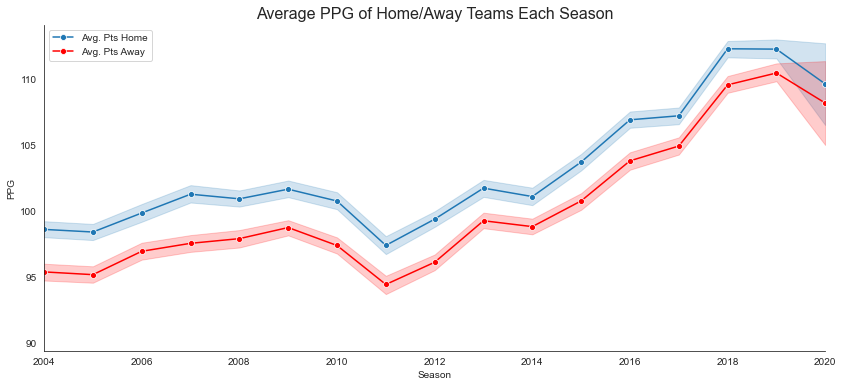

In [8]:
plt.figure(figsize=(14,6))
sns.set_style('white')

sns.lineplot(x=games['SEASON'], y='PTS_home', data=games, marker='o', label='Avg. Pts Home')
sns.lineplot(x=games['SEASON'], y='PTS_away', data=games, marker='o', label='Avg. Pts Away', color='red')

plt.title('Average PPG of Home/Away Teams Each Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('PPG')
plt.xlim(2004, 2020)

sns.despine()

plt.show()

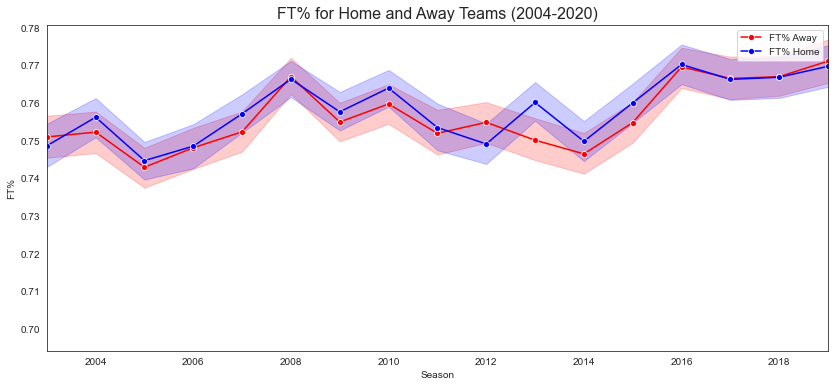

In [9]:
plt.figure(figsize=(14,6))

sns.lineplot(x=games['SEASON'], y='FT_PCT_away', data=games, marker='o', label='FT% Away', color='red')
sns.lineplot(x=games['SEASON'], y='FT_PCT_home', data=games, marker='o', label='FT% Home', color='blue')

plt.title('FT% for Home and Away Teams (2004-2020)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('FT%')
plt.xlim(2003,2019)

plt.show()

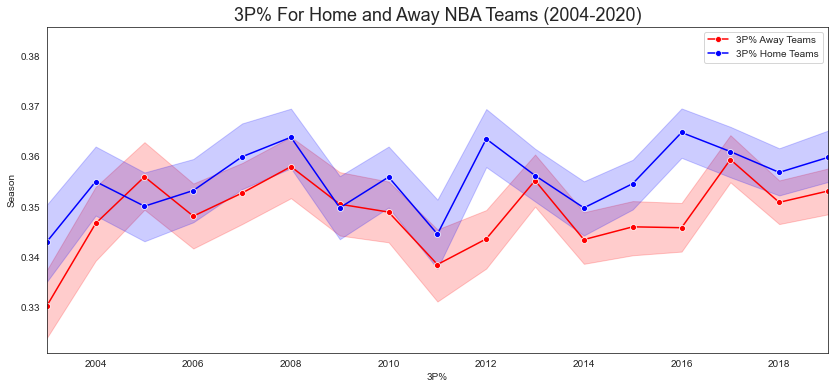

In [10]:
plt.figure(figsize=(14,6))

sns.lineplot(x=games['SEASON'], y='FG3_PCT_away', data=games, marker='o', label='3P% Away Teams', color='red')
sns.lineplot(x=games['SEASON'], y='FG3_PCT_home', data=games, marker='o', label='3P% Home Teams', color='blue')

plt.title('3P% For Home and Away NBA Teams (2004-2020)', fontsize=18)
plt.ylabel('Season')
plt.xlabel('3P%')
plt.xlim(2003,2019)


plt.show()

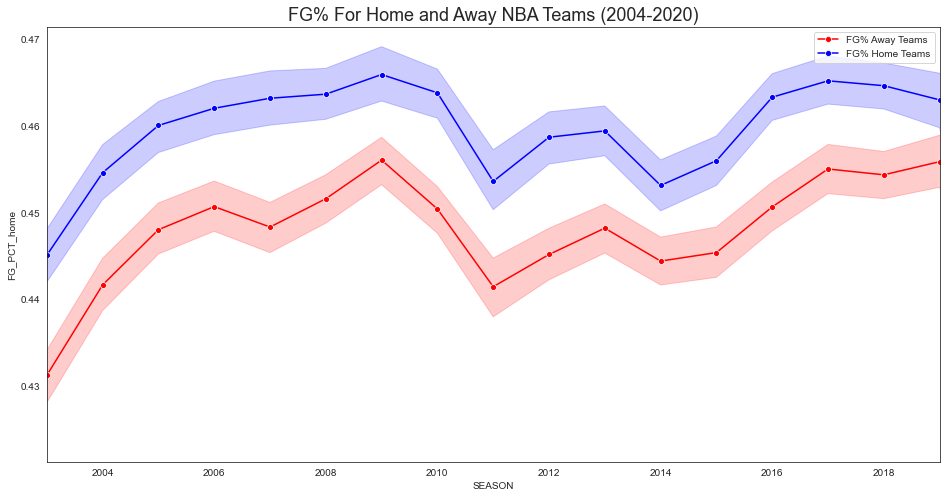

In [11]:
fix, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(x=games['SEASON'], y='FG_PCT_away', data=games, marker='o', label='FG% Away Teams', color='red')
sns.lineplot(x=games['SEASON'], y='FG_PCT_home', data=games, marker='o', label='FG% Home Teams', color='blue')

plt.title('FG% For Home and Away NBA Teams (2004-2020)', fontsize=18)
plt.xlim(2003,2019)


plt.show()

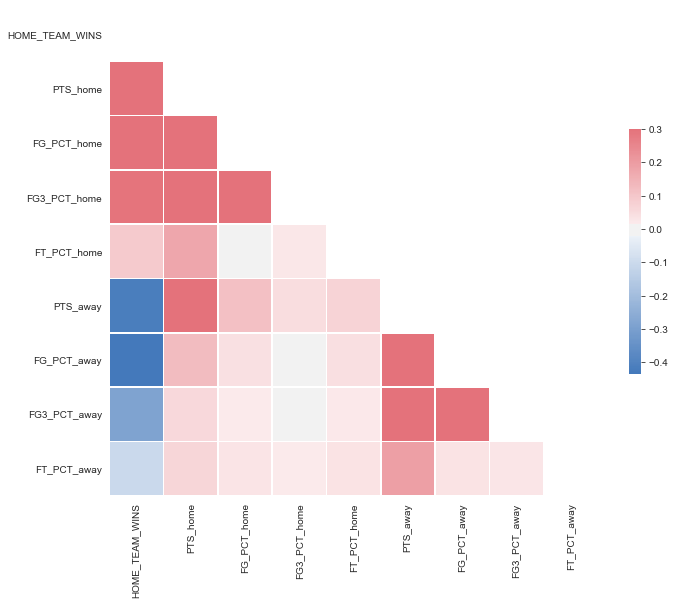

In [12]:
df_corr = games[['HOME_TEAM_WINS', 'PTS_home', 'FG_PCT_home', 'FG3_PCT_home', 'FT_PCT_home', 'PTS_away', 'FG_PCT_away', 'FG3_PCT_away', 'FT_PCT_away']]
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

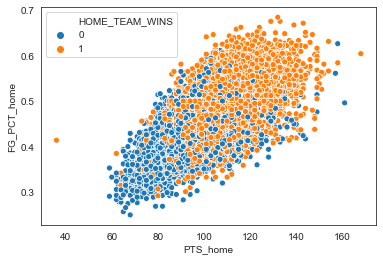

In [53]:
sns.scatterplot(x='PTS_home', y='FG_PCT_home', hue='HOME_TEAM_WINS', data=games)

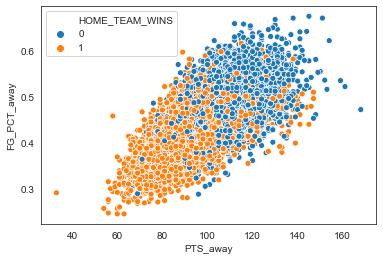

In [54]:
sns.scatterplot(x='PTS_away', y='FG_PCT_away', hue='HOME_TEAM_WINS', data=games)

## Analyzing Lonzo Ball's Career

In [13]:
lonzo = games_details[games_details['PLAYER_NAME'] == 'Lonzo Ball'] 

In [14]:
lonzo.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
287,12000043,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,NaN,34:16,7.0,11.0,0.64,3.0,6.0,0.50,2.0,3.0,0.67,0.0,5.0,5.0,8.0,2.0,1.0,3.0,4.0,19.0,13.0
1005,12000021,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,NaN,31:08,5.0,15.0,0.33,2.0,9.0,0.22,0.0,0.0,0.00,1.0,3.0,4.0,6.0,0.0,0.0,1.0,2.0,12.0,10.0
4241,21901312,1610612740,NOP,New Orleans,1628366,Lonzo Ball,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4489,21901302,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,NaN,29:04,5.0,9.0,0.56,4.0,6.0,0.67,2.0,2.0,1.00,1.0,2.0,3.0,4.0,0.0,2.0,4.0,3.0,16.0,-4.0
4732,21901287,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,NaN,31:01,2.0,10.0,0.20,0.0,4.0,0.00,1.0,1.0,1.00,2.0,3.0,5.0,10.0,0.0,2.0,3.0,3.0,5.0,-5.0


In [15]:
lonzo = lonzo.drop(columns='COMMENT')

In [16]:
lonzo = lonzo.dropna()
lonzo.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
287,12000043,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,34:16,7.0,11.0,0.64,3.0,6.0,0.50,2.0,3.0,0.67,0.0,5.0,5.0,8.0,2.0,1.0,3.0,4.0,19.0,13.0
1005,12000021,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,31:08,5.0,15.0,0.33,2.0,9.0,0.22,0.0,0.0,0.00,1.0,3.0,4.0,6.0,0.0,0.0,1.0,2.0,12.0,10.0
4489,21901302,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,29:04,5.0,9.0,0.56,4.0,6.0,0.67,2.0,2.0,1.00,1.0,2.0,3.0,4.0,0.0,2.0,4.0,3.0,16.0,-4.0
4732,21901287,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,31:01,2.0,10.0,0.20,0.0,4.0,0.00,1.0,1.0,1.00,2.0,3.0,5.0,10.0,0.0,2.0,3.0,3.0,5.0,-5.0
5089,21901278,1610612740,NOP,New Orleans,1628366,Lonzo Ball,G,31:28,1.0,7.0,0.14,0.0,3.0,0.00,0.0,0.0,0.00,3.0,6.0,9.0,5.0,1.0,3.0,3.0,2.0,2.0,-6.0


In [17]:
lonzo_3p = lonzo.groupby('TEAM_ABBREVIATION')
lonzo_3p.describe().head()

GAME_ID                                                    \
                    count      mean       std       min       25%       50%   
TEAM_ABBREVIATION                                                             
LAL                  98.0  2.14e+07  1.73e+06  1.17e+07  2.17e+07  2.17e+07   
NOP                  64.0  2.03e+07  3.65e+06  1.19e+07  2.19e+07  2.19e+07   

                                      TEAM_ID                           \
                        75%       max   count      mean  std       min   
TEAM_ABBREVIATION                                                        
LAL                2.18e+07  2.18e+07    98.0  1.61e+09  0.0  1.61e+09   
NOP                2.19e+07  2.19e+07    64.0  1.61e+09  0.0  1.61e+09   

                                                          PLAYER_ID            \
                        25%       50%       75%       max     count      mean   
TEAM_ABBREVIATION                                                               
LAL                1.61e+09  1.61e+09  1.61e+09  1.61e+09      98.0  1.63e+06   
NOP                1.61e+09  1.61e+09  1.61e+09  1.61e+09      64.0  1.63e+06   

                                                                          \
                   std       min       25%       50%       75%       max   
TEAM_ABBREVIATION                                                          
LAL                0.0  1.63e+06  1.63e+06  1.63e+06  1.63e+06  1.63e+06   
NOP                0.0  1.63e+06  1.63e+06  1.63e+06  1.63e+06  1.63e+06   

                    FGM                                          FGA         \
                  count  mean   std  min   25%  50%  75%   max count   mean   
TEAM_ABBREVIATION                                                             
LAL                98.0  3.90  2.28  0.0  2.00  4.0  5.0  12.0  98.0  10.35   
NOP                64.0  4.38  2.37  1.0  2.75  4.0  6.0  10.0  64.0  10.81   

                                                     FG_PCT                    \
                    std  min  25%   50%    75%   max  count  mean   std   min   
TEAM_ABBREVIATION                                                               
LAL                3.91  2.0  7.0  10.0  13.00  27.0   98.0  0.36  0.17  0.00   
NOP                3.75  3.0  9.0  10.5  12.25  23.0   64.0  0.40  0.15  0.11   

                                           FG3M                             \
                    25%   50%   75%   max count  mean   std  min  25%  50%   
TEAM_ABBREVIATION                                                            
LAL                0.24  0.37  0.46  0.88  98.0  1.61  1.40  0.0  1.0  1.0   
NOP                0.30  0.36  0.50  0.75  64.0  2.39  1.65  0.0  1.0  2.0   

                             FG3A                                        \
                   75%  max count  mean   std  min  25%  50%  75%   max   
TEAM_ABBREVIATION                                                         
LAL                3.0  6.0  98.0  5.23  2.39  1.0  3.0  5.0  7.0  13.0   
NOP                3.0  7.0  64.0  6.41  2.42  2.0  5.0  6.0  8.0  12.0   

                  FG3_PCT                                           FTM        \
                    count  mean   std  min   25%   50%   75%  max count  mean   
TEAM_ABBREVIATION                                                               
LAL                  98.0  0.30  0.24  0.0  0.13  0.27  0.44  1.0  98.0  0.50   
NOP                  64.0  0.36  0.20  0.0  0.24  0.33  0.50  0.8  64.0  0.81   

                                                   FTA                        \
                    std  min  25%  50%  75%  max count  mean   std  min  25%   
TEAM_ABBREVIATION                                                              
LAL                0.79  0.0  0.0  0.0  1.0  4.0  98.0  1.18  1.54  0.0  0.0   
NOP                1.23  0.0  0.0  0.0  1.0  5.0  64.0  1.27  1.57  0.0  0.0   

                                 FT_PCT                                        \
       

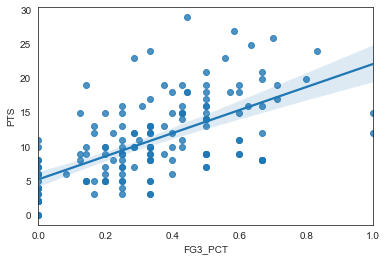

In [58]:
sns.regplot(x='FG3_PCT', y='PTS', data=lonzo)

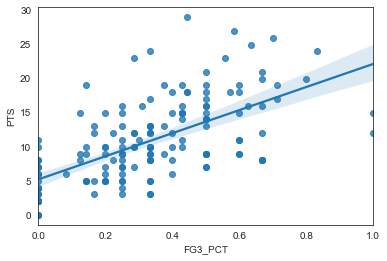

In [20]:
sns.regplot(x='FG3_PCT', y='PTS', data=lonzo)

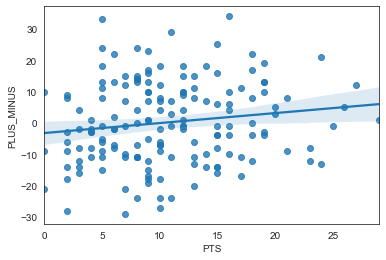

In [22]:
sns.regplot(x='PTS', y='PLUS_MINUS', data=lonzo)

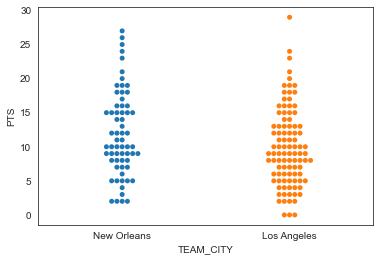

In [59]:
sns.swarmplot(y='PTS', x='TEAM_CITY', data=lonzo)

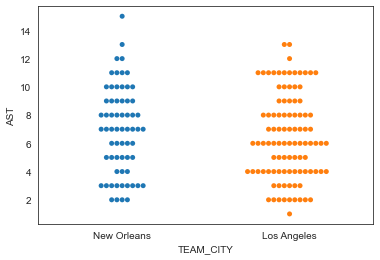

In [25]:
sns.swarmplot(y='AST', x='TEAM_CITY', data=lonzo)

In [26]:
lonzo['PTS'].value_counts(ascending=False)

9.0     15
10.0    13
8.0     13
5.0     12
12.0    10
15.0    10
2.0      8
7.0      8
6.0      7
13.0     7
16.0     7
18.0     6
4.0      6
3.0      6
19.0     6
11.0     6
14.0     4
0.0      3
17.0     3
21.0     2
24.0     2
23.0     2
20.0     2
25.0     1
26.0     1
27.0     1
29.0     1
Name: PTS, dtype: int64

Text(0, 0.5, 'Counts')

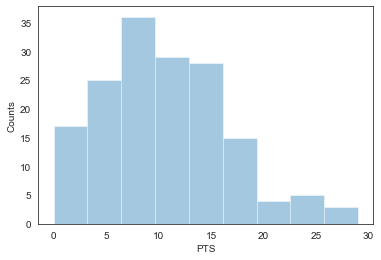

In [27]:
import seaborn as sns
sns.distplot(a=lonzo['PTS'], kde=False)
plt.ylabel('Counts')

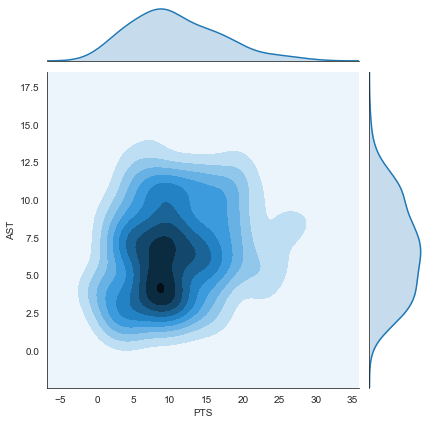

In [29]:
sns.jointplot(x=lonzo['PTS'], y=lonzo['AST'], kind='kde')

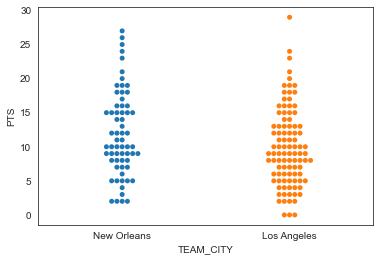

In [36]:
sns.swarmplot(x='TEAM_CITY', y='PTS', data=lonzo)

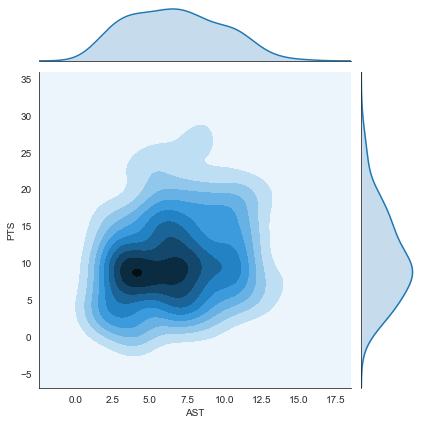

In [37]:
sns.jointplot(x='AST', y='PTS', data=lonzo, kind='kde')

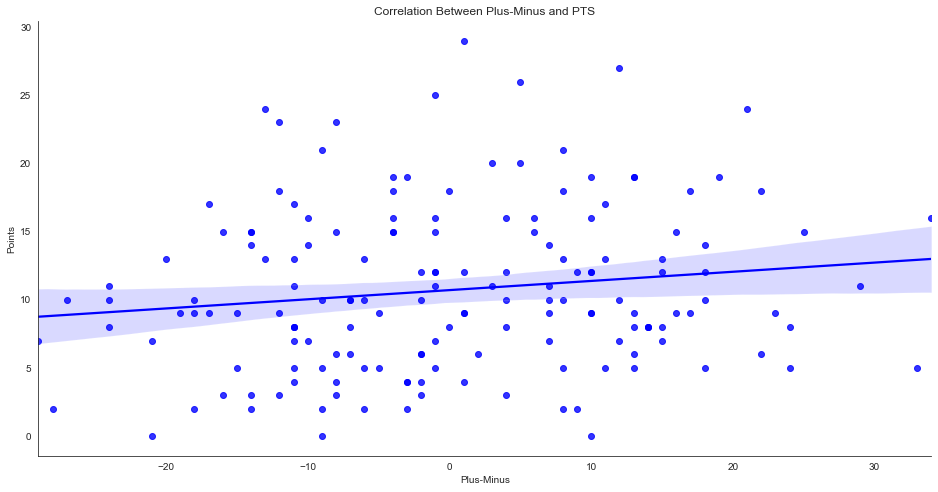

In [38]:
plt.figure(figsize=(16, 8))
sns.regplot(x='PLUS_MINUS', y='PTS', data=lonzo, color='blue')

plt.title('Correlation Between Plus-Minus and PTS')
plt.ylabel('Points')
plt.xlabel('Plus-Minus')
sns.despine()

plt.show()

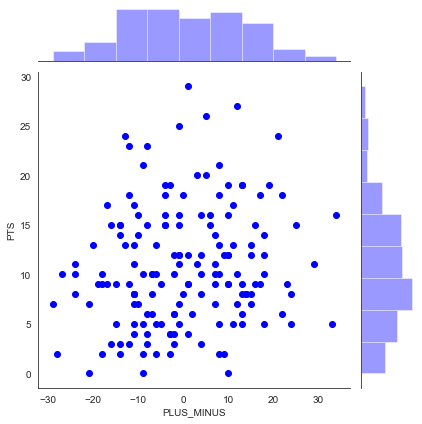

In [39]:
sns.jointplot(x='PLUS_MINUS', y='PTS', data=lonzo, color='blue')

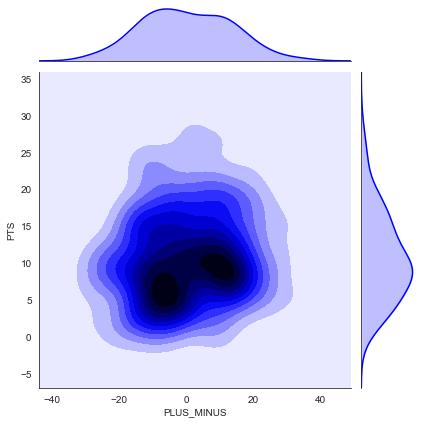

In [40]:
sns.jointplot(x='PLUS_MINUS', y='PTS', data=lonzo, color='blue', kind='kde')

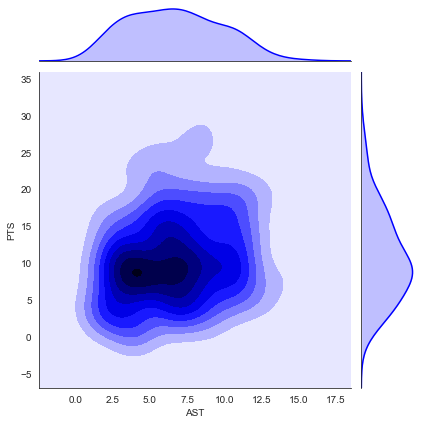

In [68]:
sns.jointplot(x='AST', y='PTS', data=lonzo, color='blue', kind='kde')

## Comparing Kobe and Lebron

*This dataset only has nba data from 2004-2020, excluding the first 8 years of Kobe Bryant's career

### Lebron

In [70]:
lebron = games_details[games_details['PLAYER_NAME'] == 'LeBron James']
lebron.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
373,12000046,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,24:39,6.0,11.0,0.55,3.0,4.0,0.75,5.0,10.0,0.50,1.0,7.0,8.0,4.0,1.0,0.0,8.0,2.0,20.0,-5.0
778,12000031,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,14:45,4.0,10.0,0.40,0.0,2.0,0.00,3.0,5.0,0.60,1.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0,11.0,2.0
1335,12000018,1610612747,LAL,Los Angeles,2544,LeBron James,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1774,12000004,1610612747,LAL,Los Angeles,2544,LeBron James,NaN,DNP - Coach's Decision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,41900406,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,41:13,13.0,20.0,0.65,1.0,5.0,0.20,1.0,4.0,0.25,3.0,11.0,14.0,10.0,1.0,0.0,1.0,3.0,28.0,18.0


In [71]:
lebron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 373 to 585702
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GAME_ID            1646 non-null   int64  
 1   TEAM_ID            1646 non-null   int64  
 2   TEAM_ABBREVIATION  1646 non-null   object 
 3   TEAM_CITY          1646 non-null   object 
 4   PLAYER_ID          1646 non-null   int64  
 5   PLAYER_NAME        1646 non-null   object 
 6   START_POSITION     1546 non-null   object 
 7   COMMENT            47 non-null     object 
 8   MIN                1599 non-null   object 
 9   FGM                1599 non-null   float64
 10  FGA                1599 non-null   float64
 11  FG_PCT             1599 non-null   float64
 12  FG3M               1599 non-null   float64
 13  FG3A               1599 non-null   float64
 14  FG3_PCT            1599 non-null   float64
 15  FTM                1599 non-null   float64
 16  FTA                1

**Cleaning the DataSet**

In [72]:
lebron = lebron.drop(columns=['COMMENT', 'GAME_ID'])
lebron = lebron.dropna()
lebron.head()

,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
373,1610612747,LAL,Los Angeles,2544,LeBron James,F,24:39,6.0,11.0,0.55,3.0,4.0,0.75,5.0,10.0,0.50,1.0,7.0,8.0,4.0,1.0,0.0,8.0,2.0,20.0,-5.0
778,1610612747,LAL,Los Angeles,2544,LeBron James,F,14:45,4.0,10.0,0.40,0.0,2.0,0.00,3.0,5.0,0.60,1.0,1.0,2.0,2.0,1.0,0.0,3.0,1.0,11.0,2.0
1810,1610612747,LAL,Los Angeles,2544,LeBron James,F,41:13,13.0,20.0,0.65,1.0,5.0,0.20,1.0,4.0,0.25,3.0,11.0,14.0,10.0,1.0,0.0,1.0,3.0,28.0,18.0
1849,1610612747,LAL,Los Angeles,2544,LeBron James,F,41:51,15.0,21.0,0.71,6.0,9.0,0.67,4.0,6.0,0.67,3.0,10.0,13.0,7.0,3.0,0.0,4.0,1.0,40.0,7.0
1862,1610612747,LAL,Los Angeles,2544,LeBron James,F,38:39,8.0,16.0,0.50,2.0,5.0,0.40,10.0,12.0,0.83,2.0,10.0,12.0,8.0,1.0,0.0,6.0,2.0,28.0,-2.0


In [73]:
lebron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 373 to 583074
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TEAM_ID            1546 non-null   int64  
 1   TEAM_ABBREVIATION  1546 non-null   object 
 2   TEAM_CITY          1546 non-null   object 
 3   PLAYER_ID          1546 non-null   int64  
 4   PLAYER_NAME        1546 non-null   object 
 5   START_POSITION     1546 non-null   object 
 6   MIN                1546 non-null   object 
 7   FGM                1546 non-null   float64
 8   FGA                1546 non-null   float64
 9   FG_PCT             1546 non-null   float64
 10  FG3M               1546 non-null   float64
 11  FG3A               1546 non-null   float64
 12  FG3_PCT            1546 non-null   float64
 13  FTM                1546 non-null   float64
 14  FTA                1546 non-null   float64
 15  FT_PCT             1546 non-null   float64
 16  OREB               1

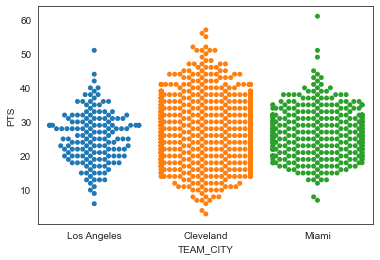

In [76]:
sns.swarmplot(x='TEAM_CITY', y='PTS', data=lebron)

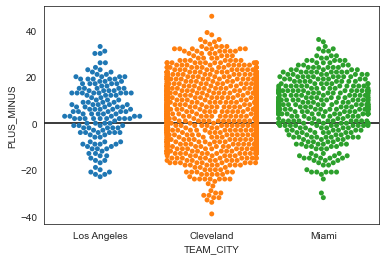

In [83]:
plus_minus = sns.swarmplot(x='TEAM_CITY', y='PLUS_MINUS', data=lebron)
plus_minus.axhline(y=0, color='black')

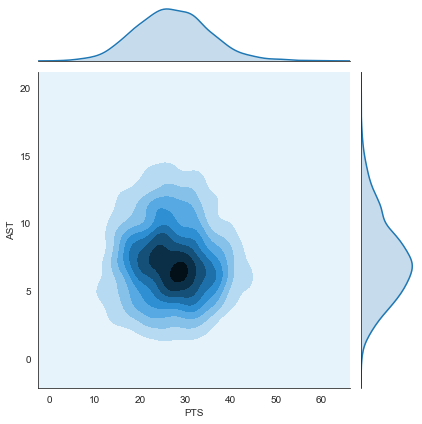

In [79]:
sns.jointplot(x='PTS', y='AST', data=lebron, kind='kde')

**KOBE**

In [74]:
kobe = games_details[games_details['PLAYER_NAME'] == 'Kobe Bryant']
kobe = kobe.drop(columns=['COMMENT', 'GAME_ID'])
kobe = kobe.dropna()
kobe.head()

,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
24064,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,43:18,10.0,23.0,0.43,2.0,5.0,0.40,8.0,8.0,1.0,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,14.0
24088,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,48:52,11.0,31.0,0.35,2.0,6.0,0.33,8.0,8.0,1.0,1.0,6.0,7.0,8.0,1.0,1.0,3.0,3.0,32.0,11.0
24112,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,40:16,11.0,25.0,0.44,4.0,9.0,0.44,5.0,10.0,0.5,1.0,2.0,3.0,8.0,0.0,0.0,4.0,5.0,31.0,-3.0
24148,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,48:30,10.0,22.0,0.46,1.0,4.0,0.25,8.0,10.0,0.8,0.0,4.0,4.0,8.0,2.0,0.0,7.0,2.0,29.0,2.0
24172,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,37:58,16.0,34.0,0.47,0.0,1.0,0.00,8.0,8.0,1.0,1.0,7.0,8.0,8.0,2.0,2.0,1.0,1.0,40.0,25.0


In [75]:
kobe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 24064 to 583103
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TEAM_ID            982 non-null    int64  
 1   TEAM_ABBREVIATION  982 non-null    object 
 2   TEAM_CITY          982 non-null    object 
 3   PLAYER_ID          982 non-null    int64  
 4   PLAYER_NAME        982 non-null    object 
 5   START_POSITION     982 non-null    object 
 6   MIN                982 non-null    object 
 7   FGM                982 non-null    float64
 8   FGA                982 non-null    float64
 9   FG_PCT             982 non-null    float64
 10  FG3M               982 non-null    float64
 11  FG3A               982 non-null    float64
 12  FG3_PCT            982 non-null    float64
 13  FTM                982 non-null    float64
 14  FTA                982 non-null    float64
 15  FT_PCT             982 non-null    float64
 16  OREB               

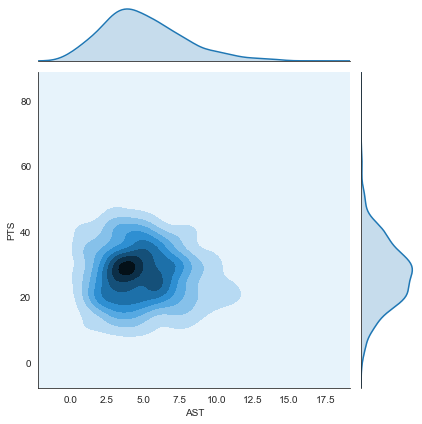

In [85]:
sns.jointplot(x='AST', y='PTS', data=kobe, kind='kde')

**Combining the two dataframes for further analysis**

In [86]:
frames = [kobe, lebron]
result = pd.concat(frames)
result.head()

,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
24064,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,43:18,10.0,23.0,0.43,2.0,5.0,0.40,8.0,8.0,1.0,0.0,6.0,6.0,5.0,2.0,4.0,1.0,2.0,30.0,14.0
24088,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,48:52,11.0,31.0,0.35,2.0,6.0,0.33,8.0,8.0,1.0,1.0,6.0,7.0,8.0,1.0,1.0,3.0,3.0,32.0,11.0
24112,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,40:16,11.0,25.0,0.44,4.0,9.0,0.44,5.0,10.0,0.5,1.0,2.0,3.0,8.0,0.0,0.0,4.0,5.0,31.0,-3.0
24148,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,48:30,10.0,22.0,0.46,1.0,4.0,0.25,8.0,10.0,0.8,0.0,4.0,4.0,8.0,2.0,0.0,7.0,2.0,29.0,2.0
24172,1610612747,LAL,Los Angeles,977,Kobe Bryant,G,37:58,16.0,34.0,0.47,0.0,1.0,0.00,8.0,8.0,1.0,1.0,7.0,8.0,8.0,2.0,2.0,1.0,1.0,40.0,25.0


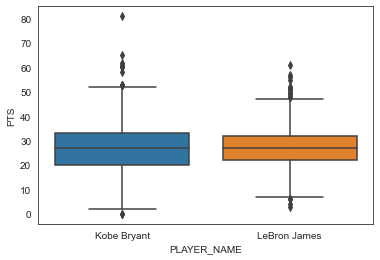

In [87]:
sns.boxplot(x='PLAYER_NAME', y='PTS', data=result)

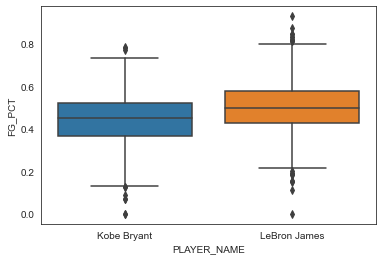

In [88]:
sns.boxplot(x='PLAYER_NAME', y='FG_PCT', data=result)

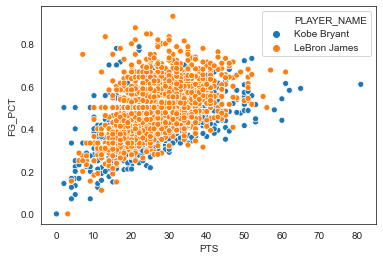

In [92]:
sns.scatterplot(x='PTS', y='FG_PCT', hue='PLAYER_NAME', data=result)

## Which Team has won the most Games from 2004-2019?

In [46]:
teams = pd.read_csv('teams.csv')

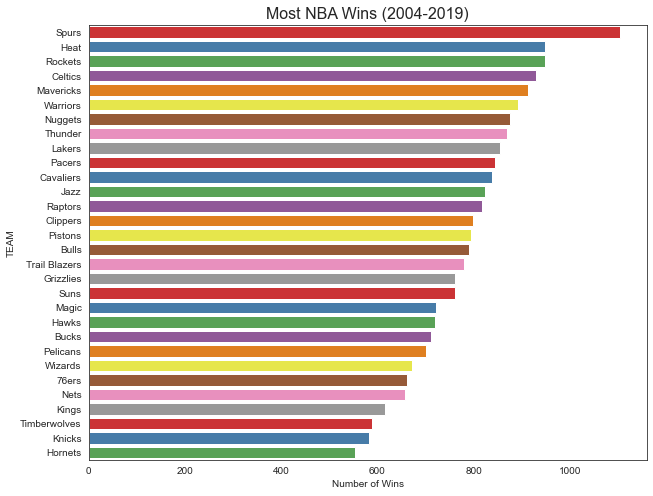

In [64]:
plt.figure(figsize=(10,8))
plt.title('Most NBA Wins (2004-2019)', fontsize=16)

team_wins = np.where(games['HOME_TEAM_WINS'] == 1, games['HOME_TEAM_ID'], games['VISITOR_TEAM_ID'])
team_wins = pd.DataFrame(team_wins, columns = ['TEAM_ID'])
team_wins = team_wins.merge(teams[['TEAM_ID', 'NICKNAME']], on='TEAM_ID')['NICKNAME'].value_counts().to_frame().reset_index()
team_wins.columns = ['TEAM NAME', 'Number of wins']

sns.barplot(team_wins['Number of wins'], team_wins['TEAM NAME'], palette='Set1')
plt.xlabel('Number of Wins')
plt.ylabel('TEAM')
plt.show()